# Projekt - Uvod u znanost o podacima 
U sklopu ovog dokumenta implementiran je projektni zadatak kolegija "Uvod u znanost o podacima" na Faklutetu elektrotehnike i računarstva. Cilj ovog projekta je replicirati te na kraju poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease."

# Opis projektnog zadataka
Cilj ovog projektnog zadatka je replicirati te zatim poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease". Svrha spomenutog znanstvenog rada je razviti prediktivne modele u području medicine. U radu su implementirani ML algoritmi za predikciju srčanih bolesti. Podatkovni skup rada predstavlja podatke pacijenata.

Projekt je podjeljen na tri dijela:
 - 1. Priprema i vizualizacija podataka
 - 2. Replikacija rezultata
 - 3. Poboljšanje rezultata
 


# 1. Priprema i vizualizacija podataka

Podaci su početni korak svakog modela strojnog učenja, stoga potrebno je učitati te zatim očisiti podatke. Podkatkovni skup koji se koristi u implementaciji ovog projekta je "Heart Failure Prediction Dataset" , dostupan na sljedećoj poveznici: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Prvi korak je učitati podatke. To ćemo učinit putem Python biblioteke - "Pandas".

In [1]:
#Importing the necessery libarys
import pandas as pd
import numpy as np

U varijablu *data_set* ćemo učitati podatkovni skup. Pogledajmo sadržaj te varijable

In [6]:
data_set=pd.read_csv("data/heart_cleveland_upload.csv")
print("The dimension of data set is : ",data_set.shape)

The dimension of data set is :  (297, 14)


Kao što je evidentno u prijašnjem ispisu, vidimo da raspolažemo s 297 podatka , gdje je svaki od njih opisan sa 14 varijabli.
Na raspolaganju nemamo veliku količinu podatka , s obzirom da su modeli strojnog učenja nekada trenirani na podatkovnim skupovima od nekoliko milijona zapisa. Bez obira na malu količinu zapisa , i dalje možemo razviti adekvatan model strojnog učenja uz uvijet da su podaci u cijelosti ispravni. Prije provjere ispravnosti podataka pogledajmo pobliže prirodu našeg podatkovnog skupa.

In [8]:
print("Name of the columns: ",list(data_set.columns))

Name of the columns:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


Iz imena stupca moguće je shvatiti koju informaciju sadrži pojedini stupac. Ali zbog preglednosti opisat ćemo zančenje pojedinog stupca:
- "age" = Starost ispitanika.
- "sex" = Spol ispitanika.
- "cp" = Razina boli u plućima
- "trestbps" = Vrijednost krvnog tlaka ispitanika.
- "chol" = Razina kolesterola ispitanika
- "fbs" = Razina šećera u krvi
- "restecg" = Rezultat ECG-a pacijeta
- "thalach" = Najveća vrijednost otkucaja srca u pacijenta.
- "Exang" = Zastavica , koja govori da li vježba uzrokuje upalu grla
- "oldpeak" = Vrijednost koja predstavlja utjecaj depresije na pacijenta.
- "slope" = Zastavica koja predstavlja stanje ispitanika tijekom fizičke aktivnosti
- "ca" = Vrijednost statusa fluoroskopija
- "thal" = Rezultati Thallium testa (testa za pacijente s poteškoćama u disanju).
- "condition" = Label stupac.

Sada znamo s kakvim podacima raspolažemo. Pogledajmo detaljno ponašanje svih varijabli u našem odatkovnog skupu.

In [9]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Iz gornje tablice vidljivo je da raspolažemo isključvo sa numeričkim podacima. Važno je naglasiti da se u par varijabli numeričke vrijednosti koriste kao klasifikator.
Nakon što smo se upoznali sa strukturom data-seta, potrebno je ispitati prisustvo null-vrijednosti u našem skupu. Null vrijednosti unutar nekog data seta predstavljaju veliku opasnost koji mogu dovesti do nestabilih modela strojnog učenje i loših predikcija.
Ispitajmo broj nedostajućih vrijednosti po varijabli(stupcu) unutar našeg odatkovnog skupa.

In [10]:
data_set.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

iz gornjeg ispisa možemo potvridit da u našem podatkovnm skupu nije prisutna niti jedna nedostajuća vrijednost.Ovo je odlično jer to znači da ne trebamo raditi nikakve modifikacije nad našim podatkovnim skupom.

Prvi stupac u našem podatkovnom skupu predstavlja starost ispitanika. Pogledajmo bolje ponašanje te varijable. Na sljedećem histogramu prikazan je broj pacijenata grupiran po starosti.

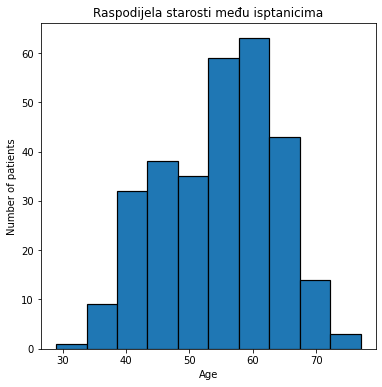

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(data_set["age"], edgecolor='black',linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Raspodijela starosti među isptanicima')
plt.show()


Evidentno je da većina ispitanika su starije životne dobi. Nadalje pogledajmo omjer muških i ženskih ispitanika u našem podatkovnom skupu.

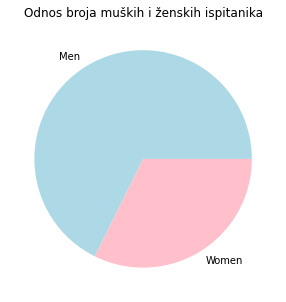

In [40]:
MF=data_set['sex'].value_counts()
MF.columns=["Men","Women"]
plt.figure(figsize=(5,5))
plt.pie(data_set['sex'].value_counts(),labels=["Men","Women"],colors=["lightblue","pink"],)
plt.title("Odnos broja muških i ženskih ispitanika")
plt.show()

Broj muškaraca je znatno veći od broja žena.
Zadnji stupac u podatkovnom skupu predstavlja binarnu varijablu, gdje vrijednost 0 predstavlja slabu vjerojatnost za zastoj srca kod pacijenta, a vrijednost 1 visoku vjerojatnost.
Prvo pogledajmo zastupljenost visoke i niske šanse za zastoj srca kod muškaraca i žena.

[112, 89]
[25, 71]


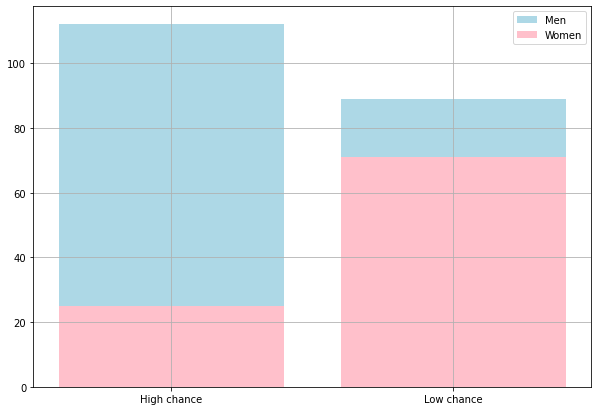

In [72]:
men_with_highC_HF=data_set[data_set["sex"]==1]
men_with_highC_HF=men_with_highC_HF[men_with_highC_HF['condition']==1]

women_with_highC_HF=data_set[data_set["sex"]==0]
women_with_highC_HF=women_with_highC_HF[women_with_highC_HF['condition']==1]

##Calculate data with low chance of heart-failure
men_with_lowC_HF=data_set[data_set["sex"]==1]
men_with_lowC_HF=men_with_lowC_HF[men_with_lowC_HF['condition']==0]

women_with_lowC_HF=data_set[data_set["sex"]==0]
women_with_lowC_HF=women_with_lowC_HF[women_with_lowC_HF['condition']==0]

men=[len(men_with_highC_HF),len(men_with_lowC_HF)]
women=[len(women_with_highC_HF),len(women_with_lowC_HF)]

print(men)
print(women)
x_asis=["High chance","Low chance"]
plt.figure(figsize=(10,7))
plt.bar(x_asis, men, color='lightblue', label='Men')
plt.bar(x_asis, women, color='pink', label='Women')
plt.legend(loc='best')
plt.grid()

Iz iznad prikazanog bar-charta možemo zaključiti da je veća vjerojatnost zastoja srca je kod muškaraca nego kod žena.Također vrijedi suprotno, mala šansa zastoja srca je više vjerojatnija za žene. Na temelju ovih rezultata iz desktiptivnog grafa možemo smatrati spol ispitanika kao prediktorsku varijablu koja može utjecati na izlaz modela strojnog učenja kojeg ćemo razviti u nastavku.

Naglasili smo da stupac "oldpeak" predstavlja razinu depresije ispitanika. U svrhu ovof rada želim pokazati kako ta varijabla utječe prvo na godine ispitanika.

<Figure size 720x720 with 0 Axes>

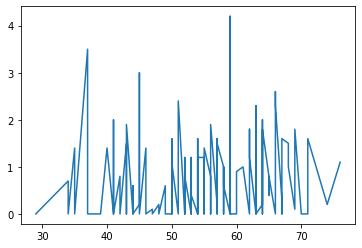

<Figure size 720x720 with 0 Axes>

In [87]:
subset=data_set.copy()
subset=subset.sort_values(by=['age'],ascending=False)

subset_highChance = subset[subset['condition']==1]
subset_lowChance = subset[subset['condition']==0]

plt.plot(subset_lowChance["age"],subset_lowChance["oldpeak"])
plt.figure(figsize=(10,10))